In [14]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import r2_score

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [7]:
N = nn.Sequential(nn.Linear(1,10), nn.Sigmoid(), nn.Linear(10,1, bias=False))
A = 0
B = 1
Psi_t = lambda x: A + B*x + (x**2) * N(x)
f = lambda x, Psi, Psi_x: -(1/5)*torch.exp(-x/5)*torch.cos(x) - Psi - (1/5)*Psi_x

In [8]:
def loss(x):
    x.requires_grad = True
    outputs = Psi_t(x)
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs), create_graph=True)[0]
    Psi_t_x_x = torch.autograd.grad(Psi_t_x, x, grad_outputs=torch.ones_like(Psi_t_x), create_graph=True)[0]
    return torch.mean((Psi_t_x_x- f(x, outputs, Psi_t_x))**2)

In [9]:
optimizer = torch.optim.LBFGS(N.parameters())
x = torch.Tensor(np.linspace(0,2,10)[:,None])
x

tensor([[0.0000],
        [0.2222],
        [0.4444],
        [0.6667],
        [0.8889],
        [1.1111],
        [1.3333],
        [1.5556],
        [1.7778],
        [2.0000]])

In [10]:
def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    return l

In [11]:
for i in range(10):
    optimizer.step(closure)

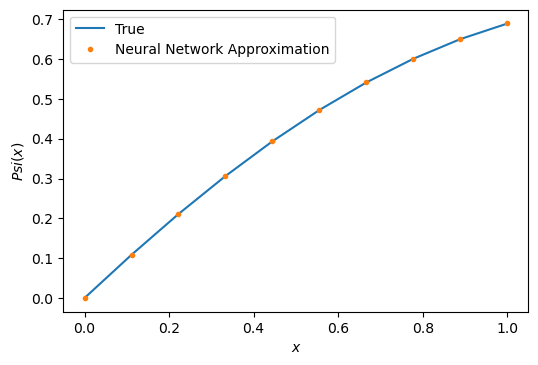

In [13]:
xx = np.linspace(0, 1, 10)[:,None]

with torch.no_grad():
    yy = Psi_t(torch.Tensor(xx)).numpy()
yt = np.exp(-xx / 5)*np.sin(xx)

fig, axs = plt.subplots(dpi=100)
axs.plot(xx, yt, label="True")
axs.plot(xx, yy, ".", label="Neural Network Approximation")
axs.set_xlabel("$x$")
axs.set_ylabel("$Psi(x)$")
plt.legend(loc="best")

In [15]:
score = r2_score(yt, yy)
score

0.9999991839743524

In [16]:
error = yt - yy
error

array([[ 0.00000000e+00],
       [ 3.05289520e-06],
       [-6.35793860e-06],
       [-4.09717943e-05],
       [-9.89078850e-05],
       [-1.69870878e-04],
       [-2.40183636e-04],
       [-2.96976103e-04],
       [-3.30525686e-04],
       [-3.36495609e-04]])

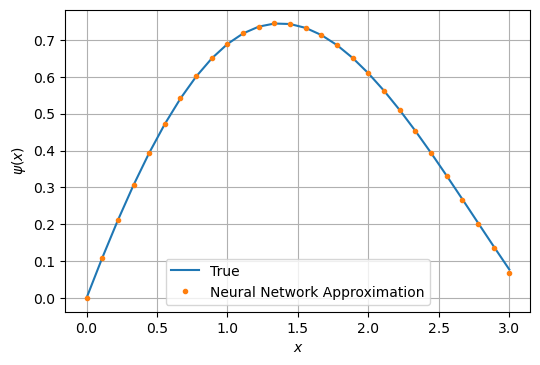

In [19]:
xxx = np.linspace(0,3,28)[:,None]
with torch.no_grad():
    yyy = Psi_t(torch.Tensor(xxx)).numpy()
yyt = np.exp(-xxx / 5)*np.sin(xxx)

fig, axs = plt.subplots(dpi=100)
axs.plot(xxx, yyt, label="True")
axs.plot(xxx, yyy, ".", label="Neural Network Approximation")
axs.set_xlabel("$x$")
axs.set_ylabel("$\psi(x)$")
plt.grid()
plt.legend(loc="best")

In [20]:
error = yyt - yyy
error

array([[ 0.00000000e+00],
       [ 3.05289520e-06],
       [-6.35793860e-06],
       [-4.09717943e-05],
       [-9.89078850e-05],
       [-1.69870878e-04],
       [-2.40183636e-04],
       [-2.96976103e-04],
       [-3.30525686e-04],
       [-3.36495609e-04],
       [-3.15939777e-04],
       [-2.75247662e-04],
       [-2.24403625e-04],
       [-1.76155192e-04],
       [-1.41641972e-04],
       [-1.29473867e-04],
       [-1.42010274e-04],
       [-1.73079968e-04],
       [-2.05659139e-04],
       [-2.10172802e-04],
       [-1.43373598e-04],
       [ 5.14076697e-05],
       [ 4.44579490e-04],
       [ 1.11845651e-03],
       [ 2.16495729e-03],
       [ 3.68366818e-03],
       [ 5.77990369e-03],
       [ 8.55773091e-03]])

In [21]:
score = r2_score(yyt, yyy)
score

0.9999135847971877

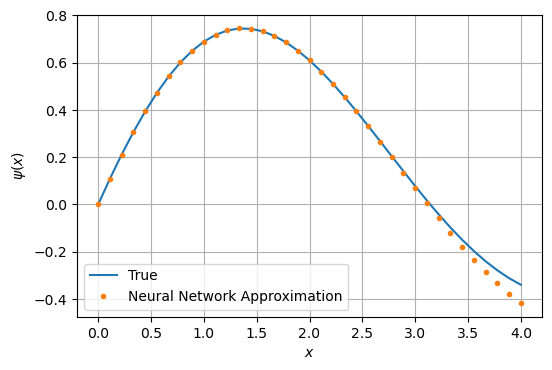

In [22]:
xxx = np.linspace(0,4,37)[:,None]
with torch.no_grad():
    yyy = Psi_t(torch.Tensor(xxx)).numpy()
yyt = np.exp(-xxx / 5)*np.sin(xxx)

fig, axs = plt.subplots(dpi=100)
axs.plot(xxx, yyt, label="True")
axs.plot(xxx, yyy, ".", label="Neural Network Approximation")
axs.set_xlabel("$x$")
axs.set_ylabel("$\psi(x)$")
plt.grid()
plt.legend(loc="best")

In [23]:
error = yyt - yyy
error

array([[ 0.00000000e+00],
       [ 3.05289520e-06],
       [-6.35793860e-06],
       [-4.09717943e-05],
       [-9.89078850e-05],
       [-1.69870878e-04],
       [-2.40183636e-04],
       [-2.96976103e-04],
       [-3.30525686e-04],
       [-3.36495609e-04],
       [-3.15939777e-04],
       [-2.75247662e-04],
       [-2.24403625e-04],
       [-1.76155192e-04],
       [-1.41641972e-04],
       [-1.29473867e-04],
       [-1.42010274e-04],
       [-1.73079968e-04],
       [-2.05659139e-04],
       [-2.10172802e-04],
       [-1.43373598e-04],
       [ 5.14076697e-05],
       [ 4.44579490e-04],
       [ 1.11845651e-03],
       [ 2.16495729e-03],
       [ 3.68366818e-03],
       [ 5.77990369e-03],
       [ 8.55773091e-03],
       [ 1.21198391e-02],
       [ 1.65612064e-02],
       [ 2.19661504e-02],
       [ 2.84045065e-02],
       [ 3.59276702e-02],
       [ 4.45676097e-02],
       [ 5.43297814e-02],
       [ 6.51951885e-02],
       [ 7.71162897e-02]])

In [24]:
score = r2_score(yyt, yyy)
score

0.9959610465640845